## 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()
df = pd.read_csv('Documents/kaggle/amazon/Reviews.csv')

## 데이터 확인

### 데이터 프레임 확인

In [63]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### 데이터 프레임 주요 구성정보

In [64]:
print(df.keys())

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


In [65]:
df.shape

(568454, 10)

In [66]:
df.info

<bound method DataFrame.info of             Id   ProductId          UserId                      ProfileName  \
0            1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1            2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2            3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3            4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4            5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   
...        ...         ...             ...                              ...   
568449  568450  B001EO7N10  A28KG5XORO54AY                 Lettie D. Carter   
568450  568451  B003S1WTCU  A3I8AFVPEE8KI5                        R. Sawyer   
568451  568452  B004I613EE  A121AA1GQV751Z                    pksd "pk_007"   
568452  568453  B004I613EE   A3IBEVCTXKNOH          Kathy A. Welch "katwel"   
568453  568454  B001LR2CU2  A3LGQPJCZVL9UC                         srfell17   

        Helpfulness

In [67]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


## 데이터 탐색

### 주요 변수 (Score 정량 리뷰) 분포 확인

In [68]:
df.Score.value_counts()

5    363122
4     80655
1     52268
3     42640
2     29769
Name: Score, dtype: int64

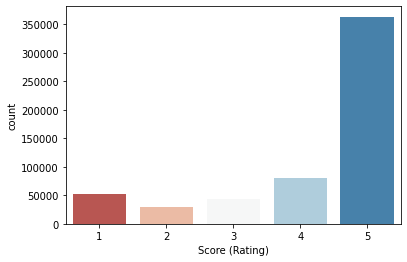

In [69]:
plt.figure()
sns.countplot(x='Score', data=df, palette='RdBu')
plt.xlabel('Score (Rating)')
plt.show()

In [71]:
temp_df.describe()

,HelpfulnessNumerator,HelpfulnessDenominator,Score
count,568454.000000,568454.00000,568454.000000
mean,1.743817,2.22881,4.183199
std,7.636513,8.28974,1.310436
min,0.000000,0.00000,1.000000
25%,0.000000,0.00000,4.000000
50%,0.000000,1.00000,5.000000
75%,2.000000,2.00000,5.000000
max,866.000000,923.00000,5.000000


### 분석에 활용할 데이터 대상 선정 및 주요 파생변수 설정

In [72]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   UserId                  568454 non-null  object
 1   HelpfulnessNumerator    568454 non-null  int64 
 2   HelpfulnessDenominator  568454 non-null  int64 
 3   Summary                 568427 non-null  object
 4   Text                    568454 non-null  object
 5   Score                   568454 non-null  int64 
 6   Sentiment               568454 non-null  object
 7   Usefulness              568454 non-null  object
dtypes: int64(3), object(5)
memory usage: 34.7+ MB


In [73]:
temp_df[temp_df.Score == 5].head(10)

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Sentiment,Usefulness
0,A3SGXH7AUHU8GW,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,positive,>75%
4,A1UQRSCLF8GW1T,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,positive,useless
6,A1SP2KVKFXXRU1,0,0,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,5,positive,useless
7,A3JRGQVEQN31IQ,0,0,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,5,positive,useless
8,A1MZYO9TZK0BBI,1,1,Yay Barley,Right now I'm mostly just sprouting this so my...,5,positive,>75%
9,A21BT40VZCCYT4,0,0,Healthy Dog Food,This is a very healthy dog food. Good for thei...,5,positive,useless
10,A3HDKO7OW0QNK4,1,1,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,5,positive,>75%
11,A2725IB4YY9JEB,4,4,"My cats LOVE this ""diet"" food better than thei...",One of my boys needed to lose some weight and ...,5,positive,>75%
14,A2MUGFV2TDQ47K,4,5,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,5,positive,>75%
15,A1CZX3CP8IKQIJ,4,5,"Lots of twizzlers, just what you expect.",My daughter loves twizzlers and this shipment ...,5,positive,>75%


### Review 긍부정 분포 확인

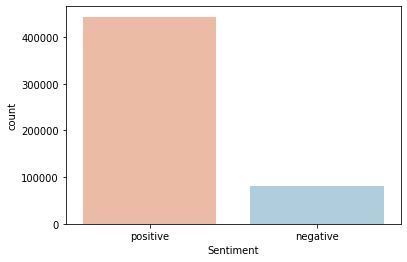

In [74]:
sns.countplot(x='Sentiment', order=["positive", "negative"], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [75]:
temp_df.Sentiment.value_counts()

positive       443777
negative        82037
not defined     42640
Name: Sentiment, dtype: int64

In [76]:
pos = temp_df.loc[temp_df['Sentiment'] == 'positive']
pos = pos[0:25000]

neg = temp_df.loc[temp_df['Sentiment'] == 'negative']
neg = neg[0:25000]

### 긍부정 리뷰 별 ‘Usefulness’의 분포

In [81]:
temp_df.Usefulness.value_counts()

useless    270052
>75%       202836
25-75%      57286
<25%        38280
Name: Usefulness, dtype: int64

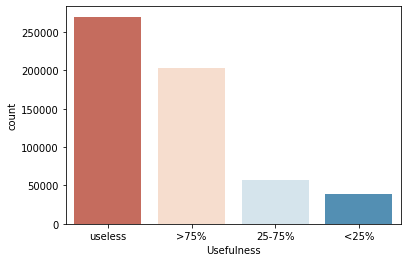

In [82]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Usefulness')
plt.show()

In [83]:
temp_df[temp_df.Score==5].Usefulness.value_counts()

useless    186743
>75%       142954
25-75%      21314
<25%        12111
Name: Usefulness, dtype: int64

In [84]:
temp_df[temp_df.Score==2].Usefulness.value_counts()

useless    10604
>75%        7423
25-75%      6693
<25%        5049
Name: Usefulness, dtype: int64

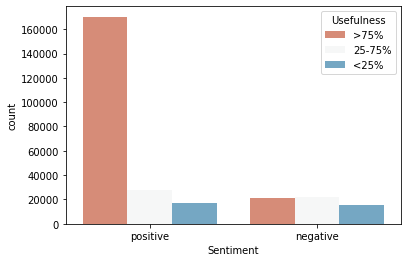

In [85]:
sns.countplot(x='Sentiment', hue='Usefulness', order=["positive", "negative"], \
              hue_order=['>75%', '25-75%', '<25%'], data=temp_df, palette='RdBu')
plt.xlabel('Sentiment')
plt.show()

In [86]:
temp_df["text_word_count"] = temp_df["Text"].apply(lambda text: len(text.split()))

In [87]:
temp_df.head()

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Sentiment,Usefulness,text_word_count
0,A3SGXH7AUHU8GW,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,positive,>75%,48
1,A1D87F6ZCVE5NK,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative,useless,31
2,ABXLMWJIXXAIN,1,1,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive,>75%,94
3,A395BORC6FGVXV,3,3,Cough Medicine,If you are looking for the secret ingredient i...,2,negative,>75%,41
4,A1UQRSCLF8GW1T,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,positive,useless,27


### Review Score별 평균 단어수 중위값

In [88]:
temp_df[temp_df.Score==5].text_word_count.median()

52.0

In [89]:
temp_df[temp_df.Score==4].text_word_count.median()

65.0

In [90]:
temp_df[temp_df.Score==3].text_word_count.median()

70.0

In [91]:
temp_df[temp_df.Score==2].text_word_count.median()

67.0

In [92]:
temp_df[temp_df.Score==1].text_word_count.median()

62.0

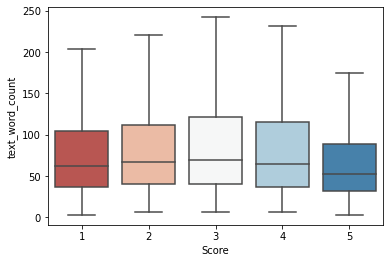

In [93]:
sns.boxplot(x='Score',y='text_word_count', data=temp_df, palette='RdBu', showfliers=False)
plt.show()

### ‘Usefulness’ 와 ‘text_world_count’ 의 상관관계

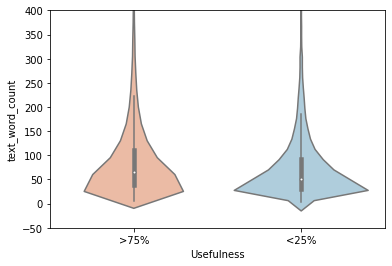

In [94]:
### Review Score별 평균 단어 분포 확인sns.violinplot(x='Usefulness', y='text_word_count', order=[">75%", "<25%"], \
               data=temp_df, palette='RdBu')
plt.ylim(-50, 400)
plt.show()

In [97]:
temp_df["reviewer_freq"] = temp_df["UserId"].apply(lambda counts: "Frequent (>50 reviews)" \
                                                                 if x[counts]>50 else "Not Frequent (1-50)")

In [98]:
temp_df.head()

,UserId,HelpfulnessNumerator,HelpfulnessDenominator,Summary,Text,Score,Sentiment,Usefulness,text_word_count,reviewer_freq
0,A3SGXH7AUHU8GW,1,1,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,positive,>75%,48,Not Frequent (1-50)
1,A1D87F6ZCVE5NK,0,0,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,negative,useless,31,Not Frequent (1-50)
2,ABXLMWJIXXAIN,1,1,"""Delight"" says it all",This is a confection that has been around a fe...,4,positive,>75%,94,Not Frequent (1-50)
3,A395BORC6FGVXV,3,3,Cough Medicine,If you are looking for the secret ingredient i...,2,negative,>75%,41,Not Frequent (1-50)
4,A1UQRSCLF8GW1T,0,0,Great taffy,Great taffy at a great price. There was a wid...,5,positive,useless,27,Not Frequent (1-50)


### Review Frequency 별 ‘Usefulness’ 상관관계

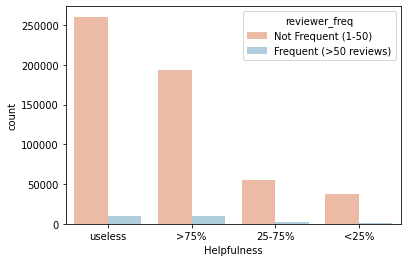

In [99]:
sns.countplot(x='Usefulness', order=['useless', '>75%', '25-75%', '<25%'], \
              hue='reviewer_freq', data=temp_df, palette='RdBu')
plt.xlabel('Helpfulness')
plt.show()

### Review Frequency 별 단어수 분포

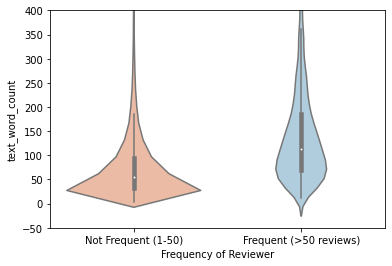

In [100]:
sns.violinplot(x='reviewer_freq', y='text_word_count',  \
               data=temp_df, palette='RdBu')
plt.xlabel('Frequency of Reviewer')
plt.ylim(-50, 400)
plt.show()